# Kickstarter campaign analysis and data visualization

Kickstarter is a great platform for anyone who needs funding for any type of project. It has become incredibly popular over the years, and has allowed many people to complete their dream project without having the initial investment. Kickstarter allows content creators to promote a project on their website. The website visitors can then decide which projects they want to help fund. 

I aquired a kickstarter data set from kaggle. The data gave information such as campaign category, goal, pledged, backers, and state. After reviewing the data, I thought these important questions should be answered.

1. What is the ideal goal for a successful project?
2. What categories of campaigns perform the best? For example,
    - Categories with highest success : failure ratio
    - Categories that attract the most backers (donations)
    - Categories that receive the most pledge money
    - Categories that are most popular

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [15]:
campaigns = pd.read_csv('ks-projects-201801.csv')

In [16]:
campaigns.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


In [17]:
failed_campaigns = campaigns[campaigns['state'] == 'failed']
sucessful_campaigns = campaigns[campaigns['state'] == 'successful']

# What is the ideal goal for a successful campaign?
First we must define a successful campaign. I defined a successful campaign as a campaign which the amount of money received is greater than or equal to the goal. There are some limitations. For example, a campaign that reaches 99% of its goal is considered a failure. The histograms below show the number of success and failures for a range of goals.

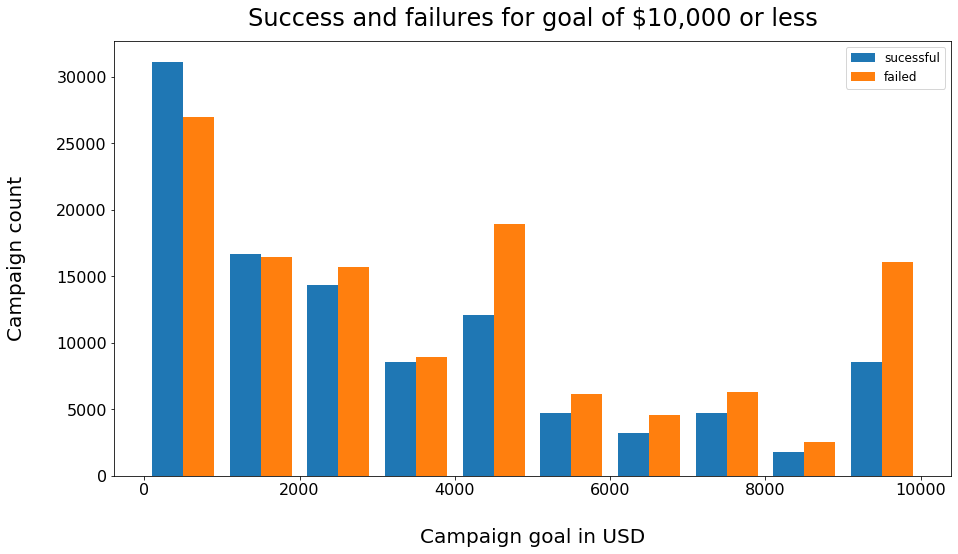

In [18]:
plt.figure(figsize=(15,8))
sucessful_goals = sucessful_campaigns[sucessful_campaigns['goal'] <= 10000]['goal']
failed_goals = failed_campaigns[failed_campaigns['goal'] <= 10000]['goal']
plt.hist([sucessful_goals, failed_goals], label=['sucessful', 'failed'])
plt.xlabel('Campaign goal in USD', fontsize=20, labelpad=30)
plt.ylabel('Campaign count', fontsize=20, labelpad=30)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.title('Success and failures for goal of $10,000 or less', fontsize=24, pad=15)
plt.legend(loc='upper right', fontsize='large')
plt.show()

## Results
- Overall 46% Of the campaigns were successful.
- \\$0 - \\$1000 goal was the only range with more success than failures.
- There appears to be a trend of increasing failure to success ratios as the campaign goal increases. I recommend choosing the smallest possible goal for project completion. This will maximize the chance for success.  

# Campaigns with goals between \\$10,000 and \\$100,000

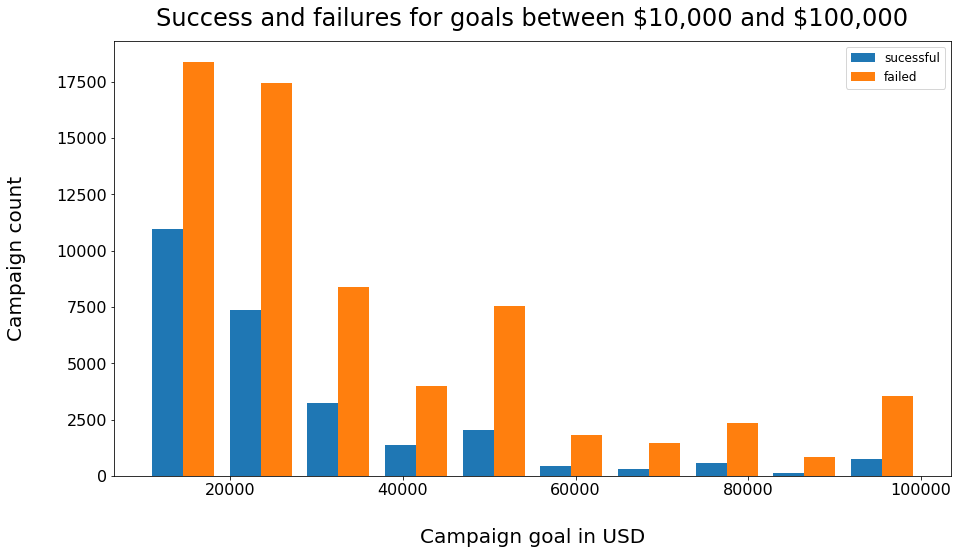

In [19]:
sucessful_large_goals = sucessful_campaigns[(sucessful_campaigns['goal'] <= 100000) & (sucessful_campaigns['goal'] > 10000)]
sucessful_large_goals = sucessful_large_goals['goal']
failed_large_goals = failed_campaigns[(failed_campaigns['goal'] <= 100000) & (failed_campaigns['goal'] > 10000)]
failed_large_goals = failed_large_goals['goal']

plt.figure(figsize=(15,8))
plt.hist([sucessful_large_goals, failed_large_goals], label=['sucessful', 'failed'])
plt.xlabel('Campaign goal in USD', fontsize=20, labelpad=30)
plt.ylabel('Campaign count', fontsize=20, labelpad=30)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.title('Success and failures for goals between \\$10,000 and \\$100,000', fontsize=24, pad=15)
plt.legend(loc='upper right', fontsize='large')
plt.show()

## Results
- Overall only 29% of the campaigns were successful.
- There appears to be a dramatic failure rate increase as the campaign goals exceed \\$10,000. I recommend compelling campaigns when the goal is such a high amount. 

# Campaigns with goals greater than \\$100,000

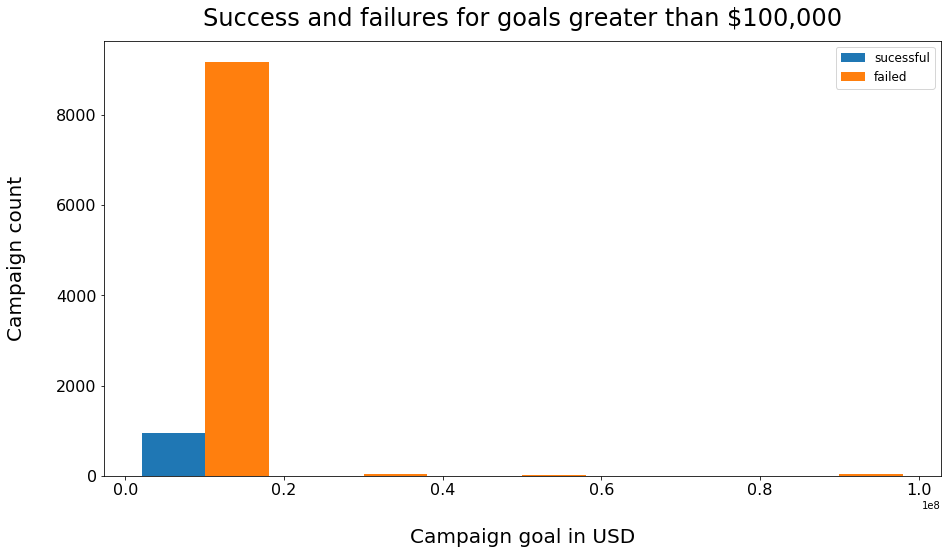

In [20]:
sucessful_huge_goals = sucessful_campaigns[sucessful_campaigns['goal'] > 100000]
sucessful_huge_goals = sucessful_huge_goals['goal']
failed_huge_goals = failed_campaigns[failed_campaigns['goal'] > 100000]
failed_huge_goals = failed_huge_goals['goal']
# sucessful_huge_goals = sucessful_campaigns[sucessful_campaigns['goal'] <= 1000000][sucessful_campaigns['goal'] > 100000]
# sucessful_huge_goals = sucessful_huge_goals['goal']
# failed_huge_goals = failed_campaigns[failed_campaigns['goal'] <= 1000000][failed_campaigns['goal'] > 100000]
# failed_huge_goals = failed_huge_goals['goal']

plt.figure(figsize=(15,8))
plt.hist([sucessful_huge_goals, failed_huge_goals], label=['sucessful', 'failed'], bins=5)
plt.xlabel('Campaign goal in USD', fontsize=20, labelpad=30)
plt.ylabel('Campaign count', fontsize=20, labelpad=30)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.title('Success and failures for goals greater than \\$100,000', fontsize=24, pad=15)
plt.legend(loc='upper right', fontsize='large')
plt.show()

## Results
- Only 10% of campagins were sucessful.
- There appears to be an even more dramatic failure rate increase as the campaign goals exceed \\$100,000. Once again I recommend extremely compelling campaigns when when asking for such a large amount of money.

# What category of campaigns are most successful?

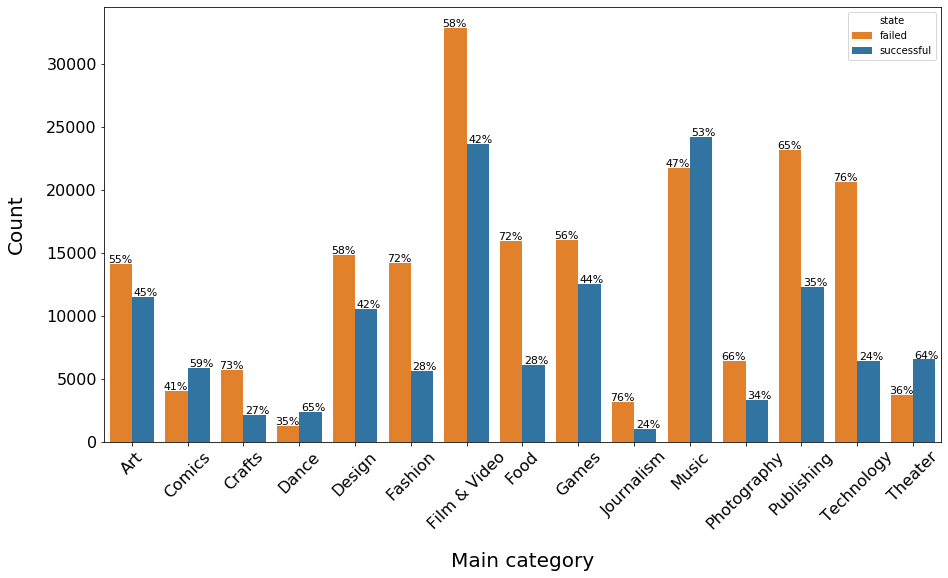

In [21]:
success_and_failures = pd.DataFrame(campaigns[campaigns['state'].isin(['failed', 'successful'])])
plt.figure(figsize=(15,8))
x = success_and_failures.sort_values('main_category')['main_category']
hue = success_and_failures.sort_values('main_category')['state']
sns.countplot(x=x, hue=hue, palette=['C1', 'C0'])

j = 0
index = sorted(list(set(campaigns['main_category'].values)))
for category in index:
    success_count = len(sucessful_campaigns[sucessful_campaigns['main_category'] == category])
    total = len(success_and_failures[success_and_failures['main_category'] == category])
    failure_count = len(failed_campaigns[failed_campaigns['main_category'] == category])
    percent_success = '{:.0f}%'.format(success_count/total*100)
    percent_failure = '{:.0f}%'.format(100 - (success_count/total*100))
    x1 = .03 + j
    y1 = success_count + 100
    plt.annotate(percent_success, xy=(x1,y1), xytext=(x1,y1), fontsize=11)
    x2 = -.43 + j
    y2 = failure_count + 100
    plt.annotate(percent_failure, xy=(x2,y2), xytext=(x2,y2), fontsize=11)
    j += 1
    
plt.xlabel('Main category', fontsize=20, labelpad=20)
plt.ylabel('Count', fontsize=20, labelpad=20)
plt.xticks(fontsize=16, rotation=45)
plt.yticks(fontsize=16)
plt.show()

## Results
Overall 40% of the campagins were successful and 60% of the campaigns failed.
#### The top performing categories were
    1. Dance --- 65% successes : 35% failures
    2. Theater --- 64% successes : 36% failures
    3. Comics --- 59% successes : 41% failures

#### The bottom performing categories were
    1. Journalism --- 24% successes : 76% failures
    2. Technology --- 24% successes : 76% failures
    3. Crafts --- 27% successes : 73% failures

# What category of campaigns get the most backers?

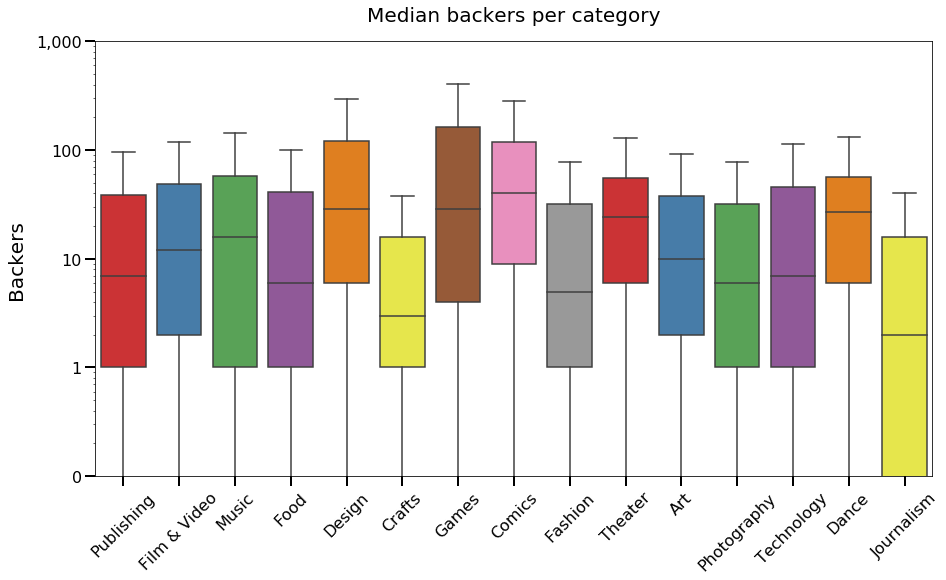

In [22]:
plt.figure(figsize=(15,8))
sns.boxplot(x=campaigns['main_category'], y=campaigns['backers'], palette='Set1', fliersize=0)
plt.yscale('log')
plt.xticks(fontsize=16, rotation=45)
plt.yticks(np.geomspace(.1, 100000, num=7), labels=('0', '1', '10', '100', '1,000', '10,000', '100,000'), fontsize=16)
plt.tick_params(axis="both", width=2, length=10)
plt.xlabel('', fontsize=20)
plt.ylabel('Backers', fontsize=20, labelpad=10)
plt.ylim(.1,1000)
plt.title('Median backers per category', fontsize=20, pad=20)
plt.show()

## Results
The median number of backers for all campaigns was 12.
#### The categories which attracted the most backers were
   1. Comics (Inner quartile range of 9-119 backers with a median of 40).
   2. Games (Inner quartile range of 4-163 backers with a median of 29).
   3. Design (Inner quartile range of 6-121 backers with a median of 29).
   4. Dance (Inner quartile range of 6-56 backers with a median of 27).
   5. Theater (Inner quartile range of 6-55 backers with a median of 24).

#### The categories that attracted the least amount of backers were
   1. Journalism (Inner quartile range of 0-16 backers with a median of 2).
   2. Crafts (Inner quartile range of 1-16 backers with a median of 3).
   3. Fashion (Inner quartile range of 1-32 backers with a median of 5).

# What category received the most pledge money?

In [23]:
category_sum = campaigns.groupby('main_category').sum()

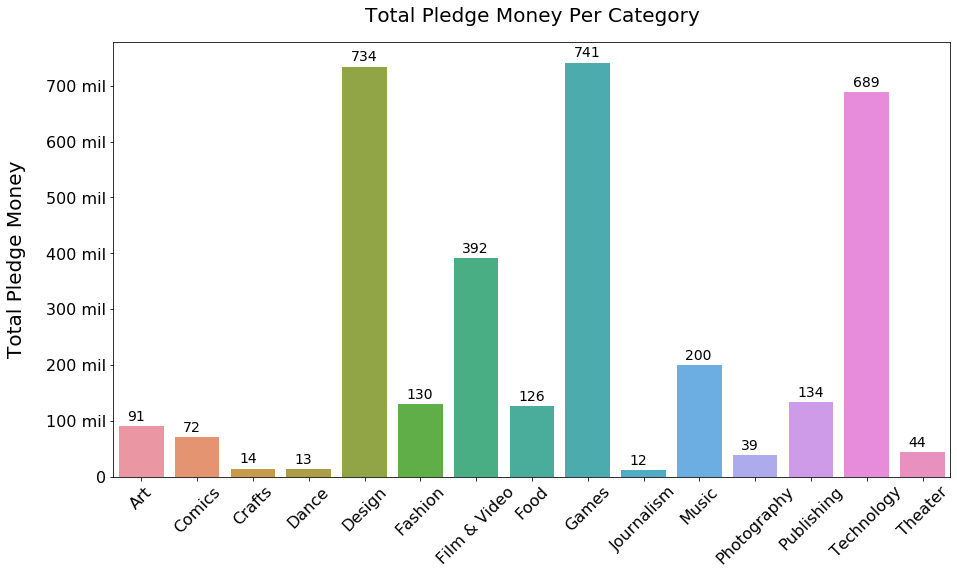

In [24]:
plt.figure(figsize=(15,8))
sns.barplot(x=category_sum.index.values, y=category_sum['usd_pledged_real'])
j = 0
for i in category_sum['usd_pledged_real']:
    sum = '{:.0f}'.format(i/10**6)
    x = -.25 + j
    y = i + 10000000
    plt.annotate(sum, xy=(x,y), xytext=(x,y), fontsize=14)
    j += 1
plt.xticks(fontsize=16, rotation=45)
plt.yticks(np.arange(0, 750000000, step=100000000), ('0', '100 mil', '200 mil', '300 mil', '400 mil', '500 mil', '600 mil', '700 mil'), fontsize=16)
plt.ylabel('Total Pledge Money', fontsize=20, labelpad=20)
plt.title('Total Pledge Money Per Category', fontsize=20, pad=20)
plt.show()

## Results
Overall there was a total of 3.43 billion dollars pledged to all the campagins in the data set.

#### Top performing categories
    1. Games (generated 741 million dollars in pledge money)
    2. Design (generated 724 million dollars in pledge money)
    3. Technology (generated 689 million dollars in pledge money)
#### Bottom performing categories
    1. Journalism (generated 12 million dollars in pledge money)
    2. Dance (generated 13 million dollars in pledge money)
    3. Crafts (generated 14 million dollars in pledge money)

# What categories are the most popular?

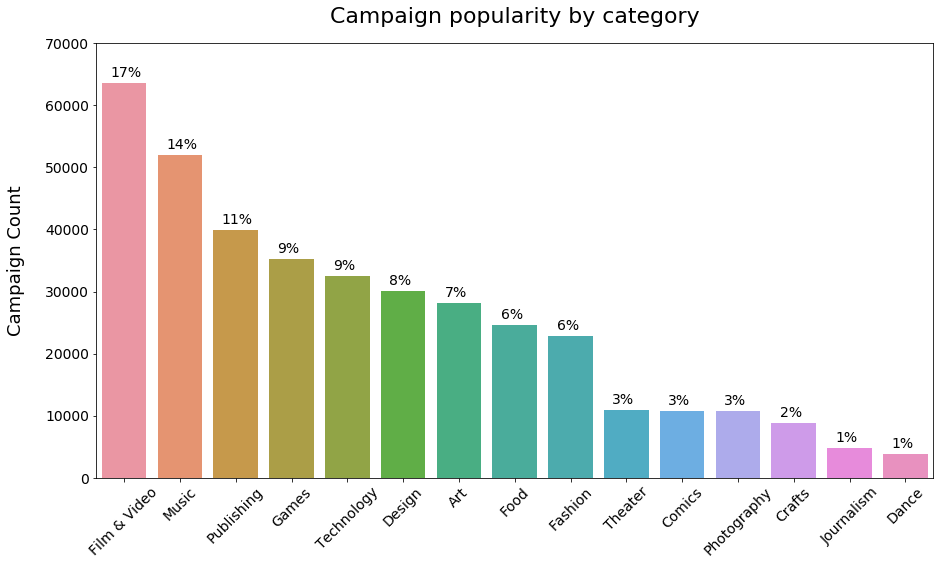

In [25]:

x = campaigns['main_category'].value_counts().index.values
y = campaigns['main_category'].value_counts()
plt.figure(figsize=(15,8))
sns.barplot(x=x, y=y)
ax = sns.barplot(x=x, y=y)
j = 0
for i in campaigns['main_category'].value_counts():
    percentage = '{:.0f}%'.format((i/np.sum(campaigns['main_category'].value_counts())*100))
    x = -.25 + j
    y = i + 1000
    plt.annotate(percentage, xy=(x,y), xytext=(x,y), fontsize=14)
    j += 1
plt.title('Campaign popularity by category', fontsize=22, pad=20)
plt.ylim(0, 70000)
plt.xticks(fontsize=14, rotation=45)
plt.yticks(fontsize=14)
plt.ylabel('Campaign Count', fontsize=18, labelpad=20)
plt.show()

## Results
Overall there are a total of 378,661 campaigns in the data set.
#### The most popular category of campaigns were
    1. Film and Video - These campaigns account for 17% of all the campaigns have a total count of 63,585.
    2. Music - These campaigns account for 14% of the campaigns and have a total of 51918.
#### The least popular category of campaigns were
    1. Dance - These campaigns account for 1% of all the campaigns and have a total count of 3768.
    2. Journalism - These campaigns account for 1% of all the campaigns and have a total count of 4755.

# What category had the highest goals?

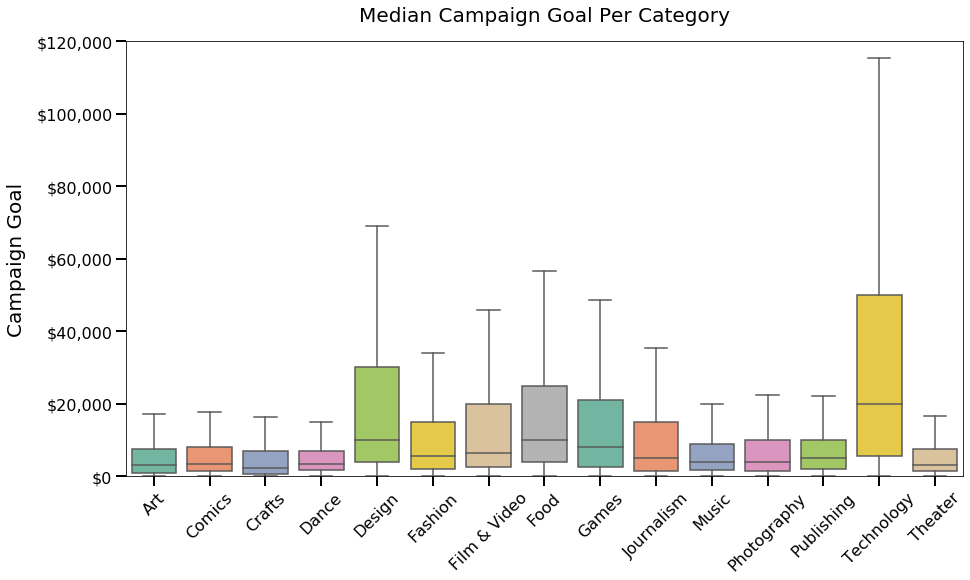

In [26]:
plt.figure(figsize=(15,8))
sns.boxplot(x=campaigns.sort_values('main_category')['main_category'], y=campaigns.sort_values('main_category')['goal'], palette='Set2', fliersize=0)
plt.xticks(fontsize=16, rotation=45)
plt.yticks(np.arange(0, 120001, 20000),fontsize=16, labels=['$0', '$20,000', '$40,000', '$60,000', '$80,000', '$100,000', '$120,000' ])
plt.tick_params(axis="both", width=2, length=10)
plt.xlabel('', fontsize=20)
plt.ylabel('Campaign Goal', fontsize=20, labelpad=10)
plt.title('Median Campaign Goal Per Category', fontsize=20, pad=20)
plt.ylim(0, 120000)
plt.show()

## Results
Overall te median goal for all campaigns was $5200

### Categories with highest goals
    1. Technology - (Inner quartile range of \\$5,000-50,000 with a median goal of $20,000)
2. Design - (Inner quartile range of \\$4,000-30,000 with a median goal of $10,000)
    3. Food - (Inner quartile range of \\$4,000-25,000 with a median goal of $10,000)

### Categories with lowest goals
    1. Crafts - (Inner quartile range of \\$700-7,000 with a median goal of $2,400)
2. Art - (Inner quartile range of \\$1,000-7,500 with a median goal of $3,000)
    3. Theater - (Inner quartile range of \\$1,500-7,500 with a median goal of $3,000)

In [27]:
# Median campaign goal by category
campaigns.groupby('main_category').describe()['goal'][['25%', '50%', '75%']].sort_index()

,25%,50%,75%
main_category,,,
Art,1000.0,3000.0,7500.0
Comics,1400.0,3500.0,8000.0
Crafts,700.0,2400.0,7000.0
Dance,1600.0,3300.0,7000.0
Design,4000.0,10000.0,30000.0
Fashion,2000.0,5505.0,15000.0
Film & Video,2500.0,6500.0,20000.0
Food,4000.0,10000.0,25000.0
Games,2500.0,8000.0,21000.0


In [28]:
index = category_sum.sort_values('usd_pledged_real', ascending=False).index.values
columns = ['plegdge money (total)', 'success : failure ratio', 'goal (median)', 'backers (median)', 'popularity']
summary_of_categories = pd.DataFrame(index=index, columns=columns)
summary_of_categories['plegdge money (total)'] = ['1st', '2nd', '3rd', '4th', '5th', '6th', '7th', '8th', '9th', '10th', '11th', '12th', '13th', '14th', '15th']
summary_of_categories['success : failure ratio'] = ['6th', '7th', '14th', '8th', '4th', '9th', '12th', '11th', '5th', '3rd', '2nd', '10th', '13th', '1st', '15th']
summary_of_categories['goal (median)'] = ['4th', '3rd', '1st', '5th', '10th', '7th', '6th', '2nd', '14th', '11th', '13th', '9th', '15th', '12th', '8th']
summary_of_categories['backers (median)'] = ['2nd', '3rd', '9th', '7th', '6th', '10th', '13th', '12th', '8th', '1st', '5th', '11th', '14th', '4th', '15th']
summary_of_categories['popularity'] = ['4th', '6th', '5th', '1st', '2nd', '3rd', '9th', '8th', '7th', '11th', '10th', '12th', '13th', '15th', '14th']

# Summary

## What is the ideal goal for a campaign?
By using the eyeball test it seems there is a strong negative correlation between campaign goals and chance of success. 48% of the campaigns were successful if the goal was under \\$10,000, and 27% of the campaigns were successful if the goal was above \\$10,000. I recommend campaigns with a goal of \\$1,000 or less for a casual project. Campaigns with goals under \\$,1000 had over 50% success rate. For projects that require larger funding goals, I recommend asking for the smallest funding goal possible as long as the job can still be fully completed. I also recommend compelling campaigns, passion, and expertise that is evident for all campaign creators.

## What category performed the best?

In [29]:
summary_of_categories

,plegdge money (total),success : failure ratio,goal (median),backers (median),popularity
Games,1st,6th,4th,2nd,4th
Design,2nd,7th,3rd,3rd,6th
Technology,3rd,14th,1st,9th,5th
Film & Video,4th,8th,5th,7th,1st
Music,5th,4th,10th,6th,2nd
Publishing,6th,9th,7th,10th,3rd
Fashion,7th,12th,6th,13th,9th
Food,8th,11th,2nd,12th,8th
Art,9th,5th,14th,8th,7th
Comics,10th,3rd,11th,1st,11th


The table above summarizes all of the plots I created by ranking each campaign category for each plot. A rank of 1st is the highest value and 15th is the lowest. Once again, there were limitations for measuring the success of a campaign. If the pledge money for a campaign was one dollar less than the campaign goal, the campaign was considered a failure. For example, Technology campagins had the highest median goal of \\$20,000. So any campaign receiving \\$19,999 in pledge money with a $20,000 goal was considered a failure. This high goal may explain the low success to failure ratio for technology campagins. Furthermore, dance campagins illustrated another example of the success to failure ratio limiations. Dance campaigns despite having the best success to failure ratio, had the second lowest amount of total pledge money. This was due to the fact dance campaigns only consisted of 1% of all campaigns, which was the least popular. 

Overall, games, design and technology were the best performing categories in most of the plots, and journalism consistently did not perform well.

# Further Research
A project creator can put together the best campaign possible, but if the best campaign practices are not implemented then there is zero chance the campaign will be successful. I believe the two factors which heavily influence campaign success are campaign GOAL and campaign MAIN CATEGORY. I believe researching these two factors will help future creators implement the best campaign practices, and help predict campaign success. Two questions which we could reasearch are -

- 1. Can we predict the success of a campaign based on campaign goal?
- 2. Can we predict the success of a campaign based on campaign category?

I will then look into the correlation between all variables, and build a classification model.